
# Project: Investigate a Dataset (No_show_appointments)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

No-show appointments
(original source on Kaggle) =====> 'noshowappointments-kagglev2-may-2016.csv'

Context
This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
A person makes a doctor appointment, receives all the instructions and no-show. Who to blame?

Content
110.527 medical appointments its 14 associated variables (characteristics). The most important one if the patient show-up or no-show to the appointment.

scholarship variable means this concept = https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia



# Data Dictionary (14 variables)

01 - PatientId
Identification of a patient

02 - AppointmentID
Identification of each appointment

03 - Gender
Male or Female .(Will be changed to 0's and 1's). Female is the greater proportion, woman takes way more care of they health in comparison to man.

04 - ScheduledDay
The day of the actuall appointment, when they have to visit the doctor.

05 - AppointmentDay
The day someone called or registered the appointment, this is before appointment of course.

06 - Age
How old is the patient.

07 - Neighbourhood
indicates the location of the hospital.

08 - Scholarship
True of False .(Will be changed to 0's and 1's). indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.

09 - Hypertension
True or False. (Will be changed to 0's and 1's).

10 - Diabetes
True or False .(Will be changed to 0's and 1's).

11 - Alcoholism
True or False. (Will be changed to 0's and 1's).

12 - Handcap
True or False .(Will be changed to 0's and 1's).

13 - SMS_received
1 or more messages sent to the patient.(Will be changed to 0's and 1's).

14 - No-show
True or False.(Will be changed to 0's and 1's).

Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.


# Questions for Analysis

- Is there a relationship between No-show and Gender?

- Is there a relationship between No-show and the age of patient?

- Is there a relationship between No-show and location of the hospital?

- Is there a relationship between No-show and whether patient is enrolled in Brasilian welfare program Bolsa Família?

- Is there a relationship between No-show and whether the patient has Hypertension?

- Is there a relationship between No-show and whether the patient is Diabetic?

- Is there a relationship between No-show and whether the patient has Alcoholism?

- Is there a relationship between No-show and whether the patient has Handicap?

- Is there a relationship between No-show and whether the patient received SMS?

- Is there a relationship between No-show and days of week?

- Is there a relationship between No-show and the length of time between the day of booking and the day of the appointment?

- What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

In [1]:
# set up import statements for all of the packages that i plan to use.
import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plotting
%matplotlib inline

import matplotlib.pylab as pylab
import seaborn as sns
plt.style.use('seaborn-colorblind')
params = {'legend.fontsize': 'x-large','figure.figsize': (15, 5),'axes.labelsize': 'x-large','axes.titlesize':'x-large',
          'xtick.labelsize':'x-large','ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, I will load in the data, check for cleanliness, and then trim and clean my dataset for analysis.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#    types and look for instances of missing or possibly errant data.
# load data file into a dataframe
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
#df.tail()      # not needed

In [4]:
#Exploreing the shape of data
df.shape

(110527, 14)

For predicting show-up status, we have 110.527 AppointmentID(rows) and 14 (columns)

In [5]:
# The basic information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


ID should be int and the 'ScheduledDay' & 'AppointmentDay' column convert to datetime

In [6]:
df.duplicated().sum().any()

False

In [7]:
df.isnull().sum().any()

False

NO nulls and no duplicates

In [8]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [9]:
df['Age'].value_counts().sort_values(ascending=False)

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

Age looks weird , maybe there is a reason I don't know .

In [10]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

Patient Id unique are "62299".

Handicap have 2,3,4 while it should have only 0's & 1's as stated on KAGGLE

### Data Cleaning 

In [11]:
len(df[df["Age"] == 0]),len(df[df["Age"] < 0])

(3539, 1)

In [12]:
#Fix age 
df=df[df.Age>0]

In [13]:
len(df[df["Age"] == 0]),len(df[df["Age"] < 0])

(0, 0)

In [14]:
# the column 'Handicap' should have only values 0 or 1 which mean false or true
# and not contains the number of Handicap [2,3,4] for each patient
# so we will replace all incorrect values from column 'Handcap' [2,3,4]  by the value of 1
df['Handcap'].replace(to_replace =[2, 3,4], value =1,inplace=True)

In [15]:
# "PatientId" will be converted to int
df.PatientId = df.PatientId.astype('int64')
#df.PatientId.dtypes

In [16]:
# convert the 'ScheduledDay' & 'AppointmentDay' column to datetime
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106987 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       106987 non-null  int64              
 1   AppointmentID   106987 non-null  int64              
 2   Gender          106987 non-null  object             
 3   ScheduledDay    106987 non-null  datetime64[ns, UTC]
 4   AppointmentDay  106987 non-null  datetime64[ns, UTC]
 5   Age             106987 non-null  int64              
 6   Neighbourhood   106987 non-null  object             
 7   Scholarship     106987 non-null  int64              
 8   Hipertension    106987 non-null  int64              
 9   Diabetes        106987 non-null  int64              
 10  Alcoholism      106987 non-null  int64              
 11  Handcap         106987 non-null  int64              
 12  SMS_received    106987 non-null  int64              
 13  No-show       

In [17]:
# renames the columns having wrong spelling.
df.rename(columns={'Alcoholism': 'Alchoholism',
                    'Hipertension': 'Hypertension',
                    'Handcap':'Handicap',
                    'No-show':'show',
                    'PatientId':'Patient_Id',
                    'AppointmentID':'Appointment_ID'},inplace=True)

In [18]:
# change the values in the data set (1 for show , 0 for no show)
df['show'].replace(to_replace =['Yes'], value =0,inplace=True)
df['show'].replace(to_replace =['No'], value =1,inplace=True)


df.head()

,Patient_Id,Appointment_ID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alchoholism,Handicap,SMS_received,show
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,867951213174,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,1


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106987 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   Patient_Id      106987 non-null  int64              
 1   Appointment_ID  106987 non-null  int64              
 2   Gender          106987 non-null  object             
 3   ScheduledDay    106987 non-null  datetime64[ns, UTC]
 4   AppointmentDay  106987 non-null  datetime64[ns, UTC]
 5   Age             106987 non-null  int64              
 6   Neighbourhood   106987 non-null  object             
 7   Scholarship     106987 non-null  int64              
 8   Hypertension    106987 non-null  int64              
 9   Diabetes        106987 non-null  int64              
 10  Alchoholism     106987 non-null  int64              
 11  Handicap        106987 non-null  int64              
 12  SMS_received    106987 non-null  int64              
 13  show          

### From ScheduledDay and AppointmentDay, I'll create new Features:

Scheduled_Hour: hour of Scheduled Day

Appointment_Time: time of Appointment Day

ScheduleDate: date of Scheduled Day

AppointmentDate: date of Appointment Day

Appointment_WeekDay: the day of the week of Appointment Day

Appointment_Month: the month of Appointment Day

Waiting_Days: waiting days before Appointment Day

In [20]:
# Get time columns from date-time columns
df['Scheduled_Hour'] = pd.to_datetime(df.ScheduledDay).dt.hour
df['Appointment_Time'] = pd.to_datetime(df.AppointmentDay).dt.time

# Convert time included date-time columns to only date columns
df['ScheduledDay'] = df['ScheduledDay'].dt.date
df['AppointmentDay'] = df['AppointmentDay'].dt.date

# Get month and week of day information from dates
df['Appointment_WeekDay'] = pd.to_datetime(df.AppointmentDay).dt.day_name()
df['Appointment_Month'] = pd.to_datetime(df.AppointmentDay).dt.month_name()

# Calculate waiting days before appointment
df['Waiting_Days'] = df.AppointmentDay - df.ScheduledDay

# Convert datatype to int
df.Waiting_Days = df.Waiting_Days.astype('str')
df.Waiting_Days = df.Waiting_Days.apply(lambda x: x.split()[0])
df.Waiting_Days = df.Waiting_Days.astype('int64')

In [21]:
df.sample(5)

,Patient_Id,Appointment_ID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alchoholism,Handicap,SMS_received,show,Scheduled_Hour,Appointment_Time,Appointment_WeekDay,Appointment_Month,Waiting_Days
55161,218965559843,5652444,F,2016-05-03,2016-05-03,16,DA PENHA,1,0,0,0,1,0,1,10,00:00:00,Tuesday,May,0
4797,5172572992726,5654781,F,2016-05-03,2016-05-05,37,BONFIM,0,0,0,0,0,0,0,15,00:00:00,Thursday,May,2
41983,645382981317,5657958,M,2016-05-04,2016-05-04,14,JOANA D´ARC,0,0,0,0,0,0,1,10,00:00:00,Wednesday,May,0
48673,38629493239944,5589779,F,2016-04-15,2016-05-13,28,PONTAL DE CAMBURI,0,0,0,0,0,0,0,12,00:00:00,Friday,May,28
32957,8252542654462,5681403,M,2016-05-10,2016-05-10,14,PRAIA DO SUÁ,0,0,0,0,0,0,1,14,00:00:00,Tuesday,May,0


Is there any scheduled day after appointment day?

In [22]:
df_error = df[df.Waiting_Days < 0 ]
df_error

,Patient_Id,Appointment_ID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alchoholism,Handicap,SMS_received,show,Scheduled_Hour,Appointment_Time,Appointment_WeekDay,Appointment_Month,Waiting_Days
27033,7839272661752,5679978,M,2016-05-10,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,0,10,00:00:00,Monday,May,-1
55226,7896293967868,5715660,F,2016-05-18,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,0,14,00:00:00,Tuesday,May,-1
64175,24252258389979,5664962,F,2016-05-05,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,0,13,00:00:00,Wednesday,May,-1
71533,998231581612122,5686628,F,2016-05-11,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,0,13,00:00:00,Thursday,May,-6
72362,3787481966821,5655637,M,2016-05-04,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,0,6,00:00:00,Tuesday,May,-1


In [23]:
df_error.shape

(5, 19)

Waiting Days will be negative and this is impossible

In [24]:
# Remove this rows from dataset

df = df[~(df.Waiting_Days <0)]

In [25]:
df.shape

(106982, 19)

In [26]:
df.Appointment_Time.nunique()

1

drop 'Appointment_Time' column , Because it is ineffective.

Remove unnecessary columns 'Patient_Id' , 'Appointment_ID'  from the Dataframe.


In [27]:
df.drop(columns=['Patient_Id', 'Appointment_ID', 'Appointment_Time'],inplace=True)

In [28]:
df.head() #final dataset

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alchoholism,Handicap,SMS_received,show,Scheduled_Hour,Appointment_WeekDay,Appointment_Month,Waiting_Days
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1,18,Friday,April,0
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1,16,Friday,April,0
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1,16,Friday,April,0
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,17,Friday,April,0
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,1,16,Friday,April,0


In [29]:
df.shape #Final data set structure

(106982, 16)

In [30]:
# Creat for the patients who show
df_show=df[df.show==1]
df_show.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alchoholism,Handicap,SMS_received,show,Scheduled_Hour,Appointment_WeekDay,Appointment_Month,Waiting_Days
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1,18,Friday,April,0
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1,16,Friday,April,0
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1,16,Friday,April,0
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,17,Friday,April,0
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,1,16,Friday,April,0


In [31]:
# Creat for the patients who no show
df_no_show=df[df.show == 0]
df_no_show.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alchoholism,Handicap,SMS_received,show,Scheduled_Hour,Appointment_WeekDay,Appointment_Month,Waiting_Days
6,F,2016-04-27,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,0,15,Friday,April,2
7,F,2016-04-27,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,0,15,Friday,April,2
11,M,2016-04-26,2016-04-29,29,NOVA PALESTINA,0,0,0,0,0,1,0,8,Friday,April,3
17,F,2016-04-28,2016-04-29,40,CONQUISTA,1,0,0,0,0,0,0,9,Friday,April,1
20,F,2016-04-27,2016-04-29,30,NOVA PALESTINA,0,0,0,0,0,0,0,7,Friday,April,2


<a id='eda'></a>
## Exploratory Data Analysis




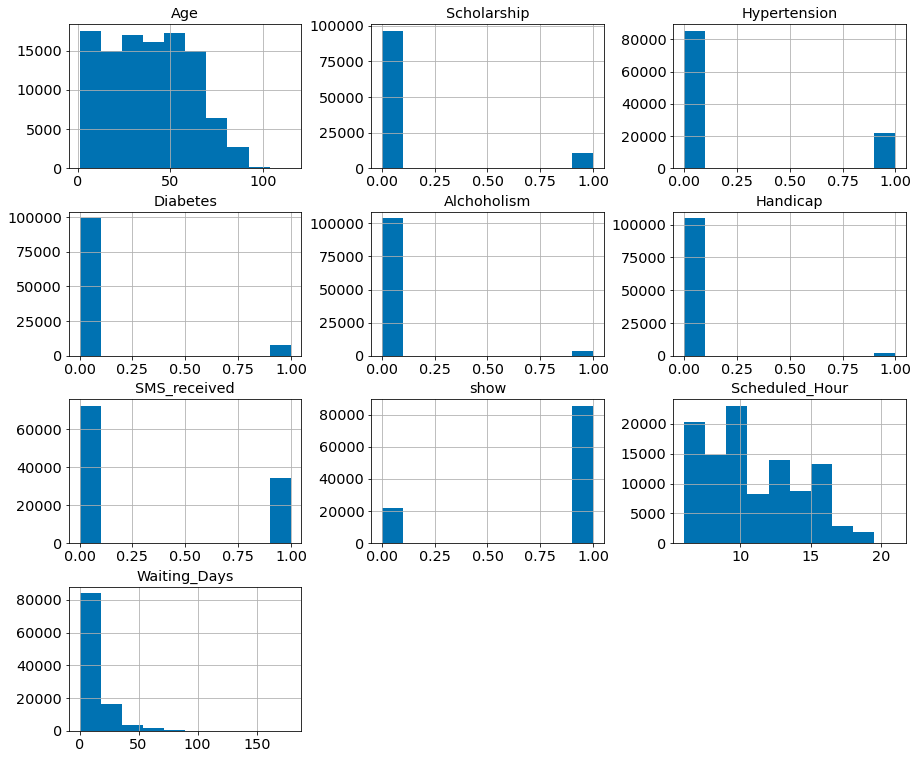

In [32]:
df.hist(figsize=(15,13));

Checking the corrolation to see the realtion between variables

#### What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

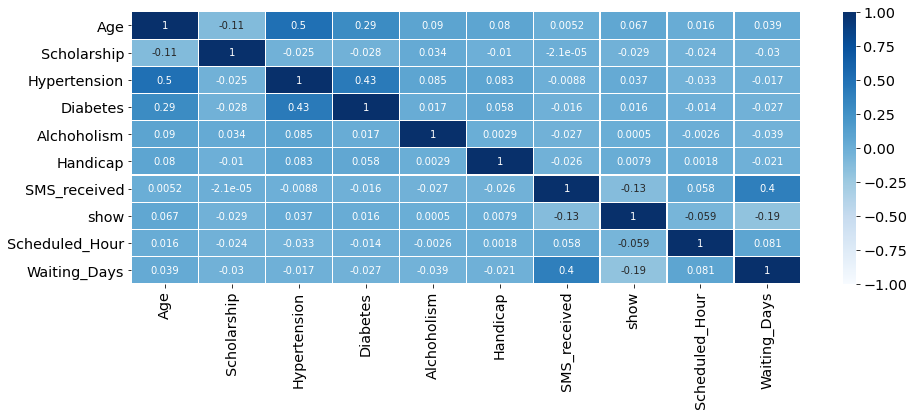

In [33]:
#help(sns.heatmap)
sns.heatmap(df.corr(), vmin = -1, vmax = 1, cmap = "Blues", linewidths=0.1, annot=True);

As shown, there is a strong relation between Diabetes, Hipertension,Alcoholism and Age

### Which is more attendance or absenteeism?

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


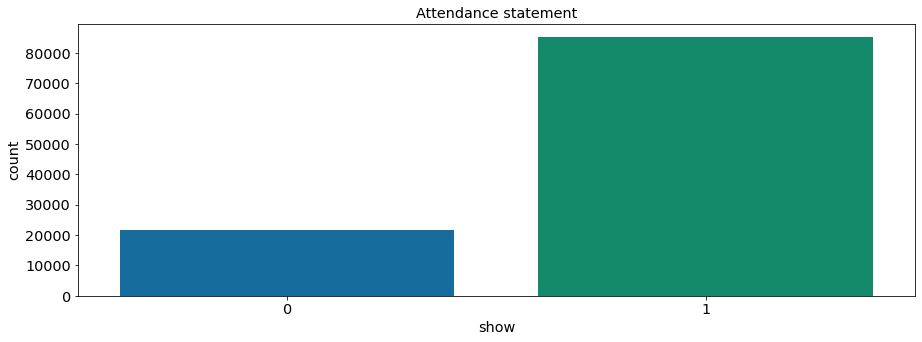

In [34]:
# Attendance statement
sns.countplot(df.show)
plt.title('Attendance statement')
plt.show();

In [35]:
df.show.value_counts()

1    85307
0    21675
Name: show, dtype: int64

'85307' show

'21675' no-show

### Who is more absent than the other?

In [36]:
# Creating a function for plotting of a certain feature for each label (show and no_show).
def  sns_countplot(x,hue):
    sns.countplot(x=x, data=df, hue=hue)
    plt.title('{} and {} relationship'.format(x,hue))
    plt.show();

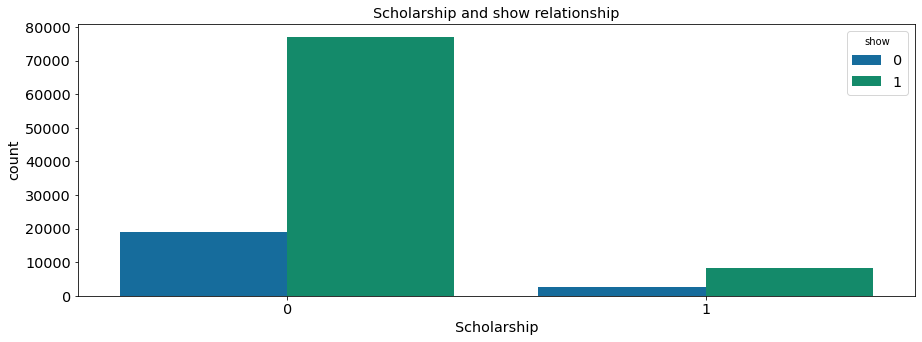

In [37]:
# Scholarship and Show relationship
sns_countplot('Scholarship','show')

In [38]:
# Display counts of Scholarship
counts_of_Scholarship = df['Scholarship'].value_counts()
counts_of_Scholarship

0    96173
1    10809
Name: Scholarship, dtype: int64

In [39]:
# Display counts of Scholarship
counts_of_Scholarship = df_show['Scholarship'].value_counts()
counts_of_Scholarship

0    77069
1     8238
Name: Scholarship, dtype: int64

In [40]:
# Display counts of Scholarship
counts_of_Scholarship = df_no_show['Scholarship'].value_counts()
counts_of_Scholarship

0    19104
1     2571
Name: Scholarship, dtype: int64

- The total number of a scholarships is 10809, of whom 8238 attended and 2571 did not attend

- The total number of non-scholarships is 96173, of whom 77069 attended and 19104 did not attend

The number of attendance of those who do not have a Scholarship is much greater than those who have a Scholarship

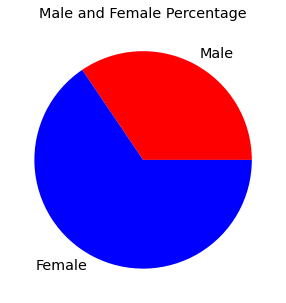

In [41]:
fig, ax = plt.subplots()
plt.pie([df.Gender[df.Gender=='M'].count(),df.Gender[df.Gender=='F'].count()],
        labels = ['Male','Female'],colors=['r','b'])

ax.set(title='Male and Female Percentage');

In [42]:
# Display counts of Gender
counts_of_Gender = df['Gender'].value_counts()
counts_of_Gender

F    70115
M    36867
Name: Gender, dtype: int64

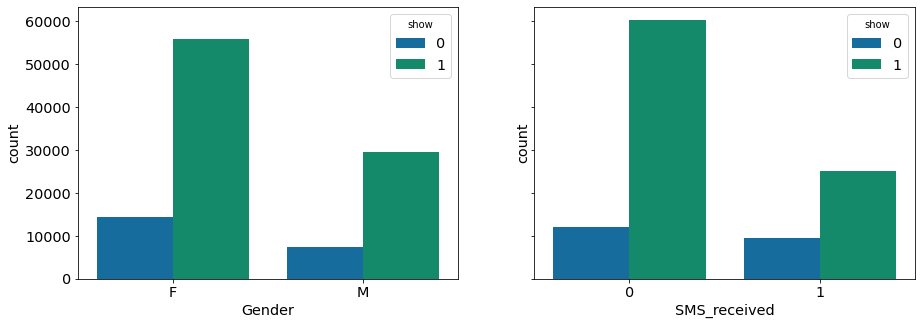

In [43]:
# (Gender, SMS_received) and Show relationship
fig, (ax1,ax2) = plt.subplots(ncols=2, sharey=True)
sns.countplot(x='Gender', hue='show', ax=ax1, data=df)
sns.countplot(x='SMS_received', hue='show', ax=ax2, data=df)
#fig.set_figwidth()
#fig.set_figheight()
plt.show();

In [44]:
# Display counts of SMS_received
counts_of_SMS_received = df['SMS_received'].value_counts()
counts_of_SMS_received

0    72397
1    34585
Name: SMS_received, dtype: int64

Females schedule appointments more frequently than men.

Strange, high rate of non-attendance in the group of messages received from the non-received group, the system for sending messages or their content should be reviewed

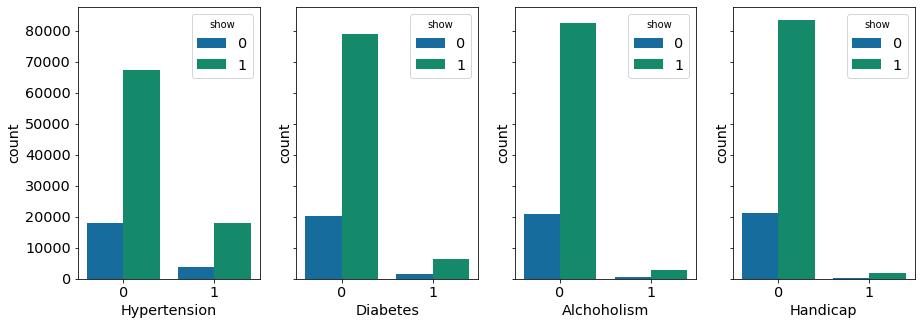

In [45]:
# Diseases and Show relationship
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, sharey=True)
sns.countplot(x='Hypertension', data=df, hue='show', ax=ax1)
sns.countplot(x='Diabetes', data=df, hue='show', ax=ax2)
sns.countplot(x='Alchoholism', data=df, hue='show', ax=ax3)
sns.countplot(x='Handicap', data=df, hue='show', ax=ax4)
plt.show();

The graphs above show that hypertension is more common than diabetes in the patients participating in the study.

It is rare for patients (Hypertension - diabetes - alcoholism - Handicap) not to go to an appointment.

In [46]:
# Display counts of Hypertension
counts_of_Hypertension = df['Hypertension'].value_counts()
counts_of_Hypertension

0    85181
1    21801
Name: Hypertension, dtype: int64

In [47]:
# Display counts of Diabetes
counts_of_Diabetes = df['Diabetes'].value_counts()
counts_of_Diabetes

0    99039
1     7943
Name: Diabetes, dtype: int64

In [48]:
# Display counts of Alchoholism
counts_of_Alchoholism = df['Alchoholism'].value_counts()
counts_of_Alchoholism

0    103622
1      3360
Name: Alchoholism, dtype: int64

In [49]:
# Display counts of Handicap
counts_of_Handicap = df['Handicap'].value_counts()
counts_of_Handicap

0    104744
1      2238
Name: Handicap, dtype: int64

### What is the most frequent time ?

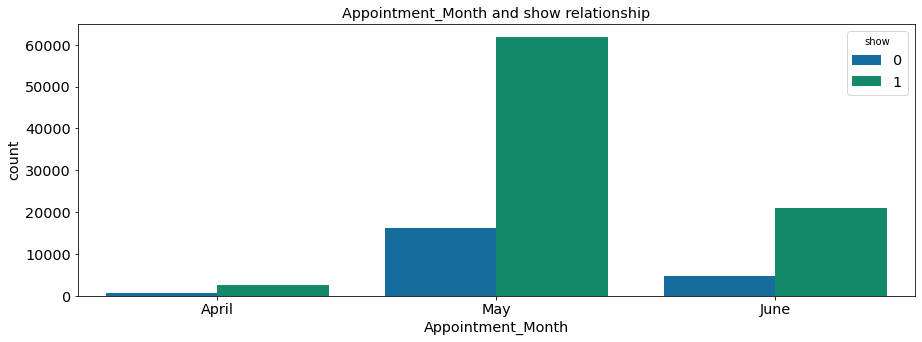

In [50]:
# Appointment_Month and Show relationship
sns_countplot('Appointment_Month','show')

'May' is the most popular month for patients to book an appointment

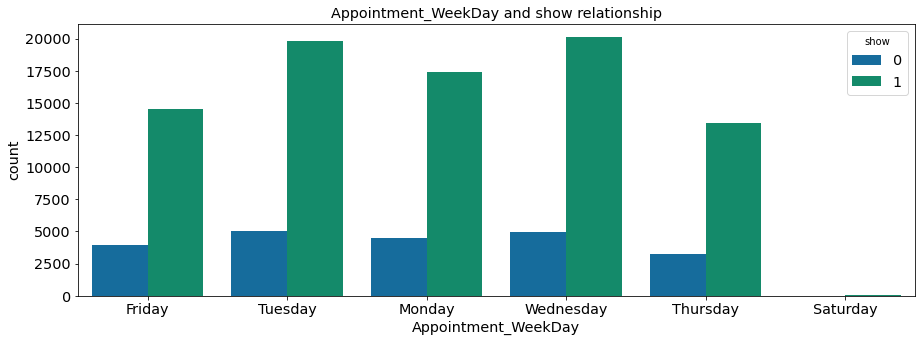

In [51]:
# Appointment_WeekDay and Show relationship
sns_countplot('Appointment_WeekDay','show')

On (Tuesday, Wednesday) most days, patients make an appointment.

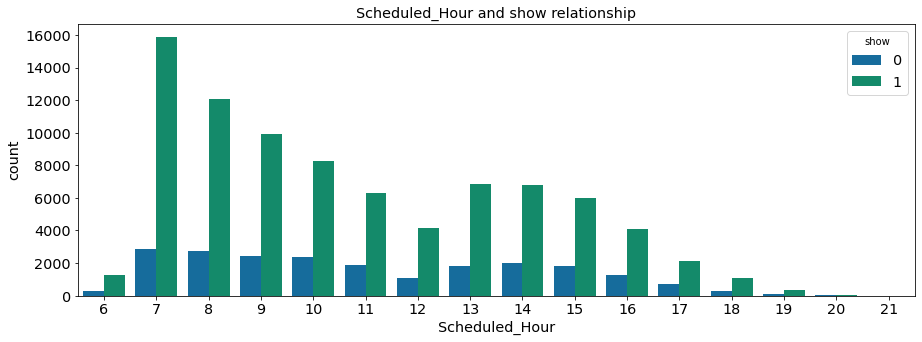

In [52]:
# Scheduled_Hour and Show relationship
sns_countplot('Scheduled_Hour','show')

In (7,8,9,10) more hours, patients make an appointment.

There is no significant difference between the days of the week in terms of not missing an appointment.

In [53]:
# Display counts of Neighbourhood
counts_of_Neighbourhood = df['Neighbourhood'].mode()
counts_of_Neighbourhood

0    JARDIM CAMBURI
dtype: object

In [54]:
df['Neighbourhood'].value_counts().sort_values(ascending=False)

JARDIM CAMBURI                 7586
MARIA ORTIZ                    5563
RESISTÊNCIA                    4234
JARDIM DA PENHA                3851
ITARARÉ                        3412
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64

the most  5 Neighbourhood are:

    JARDIM CAMBURI
    
    MARIA ORTIZ
    
    RESISTÊNCIA
    
    JARDIM DA PENHA
    
    ITARARÉ


# Conclusions

- No Null values or missing.

- No Duplicates

- Hypertension is an important factor for higher attendance frequency.

- Strange, high rate of non-attendance in the group of messages received from the non-received group, the system for sending messages or their content should be reviewed.

- There is no significant difference between the days of the week in terms of not missing an appointment.

- Patient Id unique are "62299" & "110.527" AppointmentID.

- '85307' show  &  '21675' no-show

- Females schedule appointments more frequently than men.

- The graphs above show that hypertension is more common than diabetes in the patients participating in the study.The graphs above show that hypertension is more common than diabetes in the patients participating in the study.

- It is rare for patients (Hypertension - diabetes - alcoholism - Handicap) not to go to an appointment. 

- The most 5 Neighbourhood are:
    JARDIM CAMBURI - MARIA ORTIZ - RESISTÊNCIA - JARDIM DA PENHA - ITARARÉ

- 'May' is the most popular month for patients to book an appointment.

- On (Tuesday, Wednesday) most days, patients make an appointment.

- In (7,8,9,10) more hours, patients make an appointment.

- There is no significant difference between the days of the week in terms of not missing an appointment.

# Limitations

we can see some problems in the data:

1- Negative value in the age.

2- Too many value in Age .

3- Some data need to type change ( ScheduledDay and AppointmentDay Columns data)

4- Need to calculate the dalay time between the scheduledday and appointmentday.

5- Need to Rename the no-show & Alcoholism & Hipertension & Handcap columns.